# **Problem Statements:** EDA on Netflix Data

## **Description:**

* **Netflix is an American subscription video on-demand over-the-top streaming television service owned and operated by Netflix, Inc., a company based in Los Gatos, California. It offers films and television series from various genres and it is available in multiple languages.**

* **Netflix was founded in 1997 by Reed Hastings and Marc Randolph. The company started as a DVD-by-mail service, but it soon transitioned to streaming video. Netflix is one of the most popular streaming services in the world, with over 222 million subscribers in over 190 countries.**

* **Netflix is a subscription service, which means that users pay a monthly fee to access the content. There are three different subscription plans available: Basic, Standard, and Premium. The Basic plan allows users to watch on one screen at a time, the Standard plan allows users to watch on two screens at a time, and the Premium plan allows users to watch on four screens at a time.**

* **Netflix is available on a variety of devices, including smartphones, tablets, computers, and smart TVs. The service can also be streamed through a variety of streaming devices, such as Roku, Amazon Fire TV, and Apple TV.**

* **Netflix is a popular streaming service with a wide variety of content. The company is constantly adding new content, and it is a great way to watch movies and TV shows. If you are looking for a streaming service, Netflix is a great option.**

# 1.0 **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 **Load The DataSet**

In [2]:
netflix_df=pd.read_csv("netflix_titles.csv")
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## 2.1 Datasets Summary:

The dataset was created by scraping the Netflix website. The data is updated regularly.

Here is a brief explanation of the dataset:

* **show_id:** The Netflix ID is a unique identifier for each title on Netflix.
* **title:** The title is the name of the show or movie.
* **type:** The type of title indicates whether the title is a movie, TV show, stand-up special, etc.
* **country:** The country indicates the country in which the title is available.
* **release_date:** The release_date indicates the date the title was released on Netflix.
* **rating:** The rating indicates the Netflix rating for the title.
* **genres:** The genres indicate the genres of the title.
* **description:** The description is a brief description of the title.
* **director:** The director is the director of the title.
* **cast:** The cast is the cast of the title.
* **duration:** The duration indicates the duration of the title in minutes.
* **listed_in:** The listed_in indicates the categories in which the title is listed.
* **language:** The language indicates the language of the title.

* This dataset can be used to explore the content available on Netflix. It can also be used to identify trends in Netflix content.



# 3.0 Data Exploration

In [3]:
netflix_df.shape


(7787, 12)

* In this DataSet 7787 observation and 12 Features

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [18]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 4.0 Data Cleaning

* Checking null value and handling

In [6]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
netflix_df.director.fillna("No Director ",inplace=True)
netflix_df.cast.fillna("No Cast",inplace=True)
netflix_df.country.fillna("Country Unavailable",inplace=True)

In [8]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

* date_added have 10 na so remove it

In [9]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* **Convert Date Time format**

In [20]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['year_added'].astype(int);
netflix_df['day_added'].astype(int);

In [21]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%       No Director    
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added  
0            8  
1           12  
2           12  
3           11  
4            1

# 5.0 Exploratory Analysis and Visualization

* **Type: Movie and TV Shows**

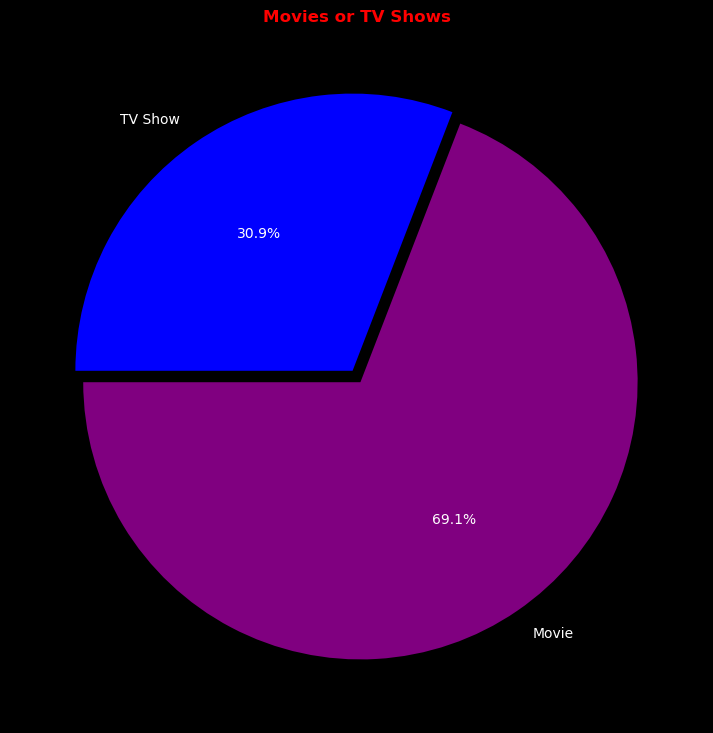

In [12]:
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
plt.title("Movies or TV Shows",weight='bold',color='red')
p=plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts().index,colors=['purple','blue'],autopct='%1.1f%%',startangle=180)
plt.show()

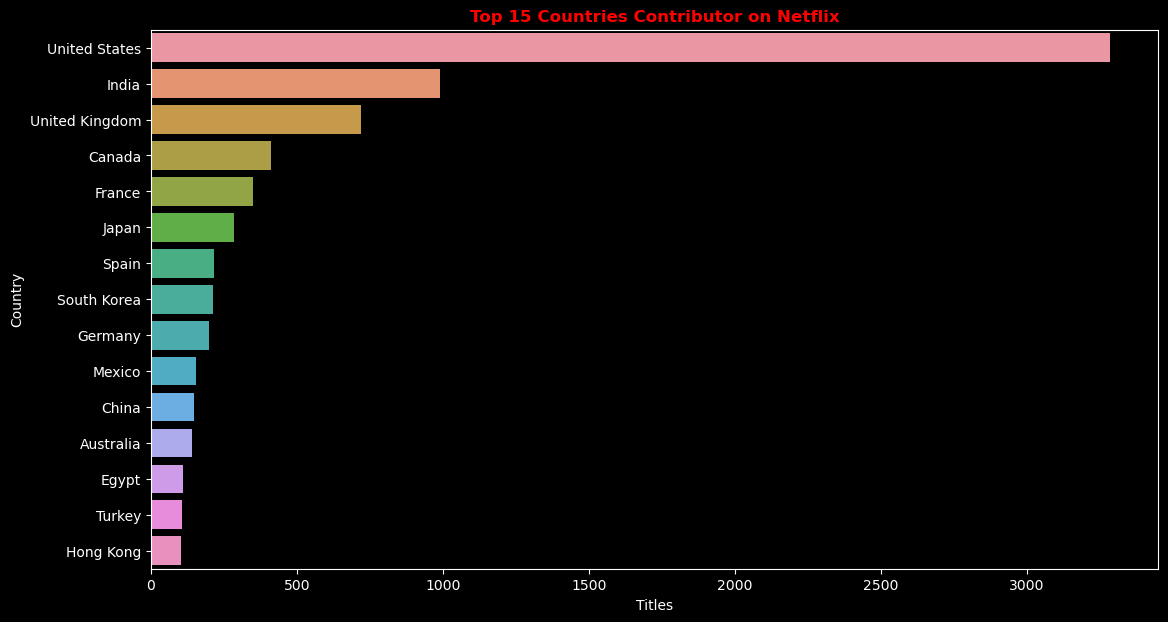

In [13]:
# Countries by the Amount of the Produces Content

filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13, 7))
g = sns.countplot(y=filtered_countries,
                  order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix',color='red',weight='bold')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


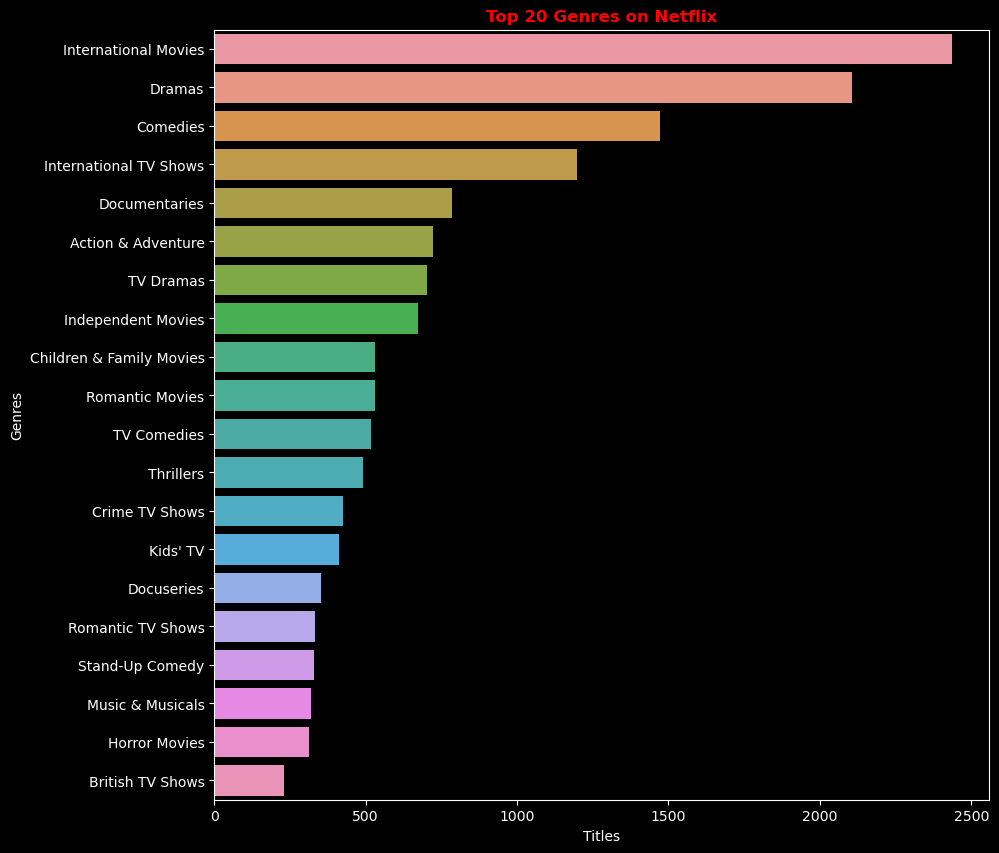

In [14]:
# Top Genres on Netflix

filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',color='red',weight='bold')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

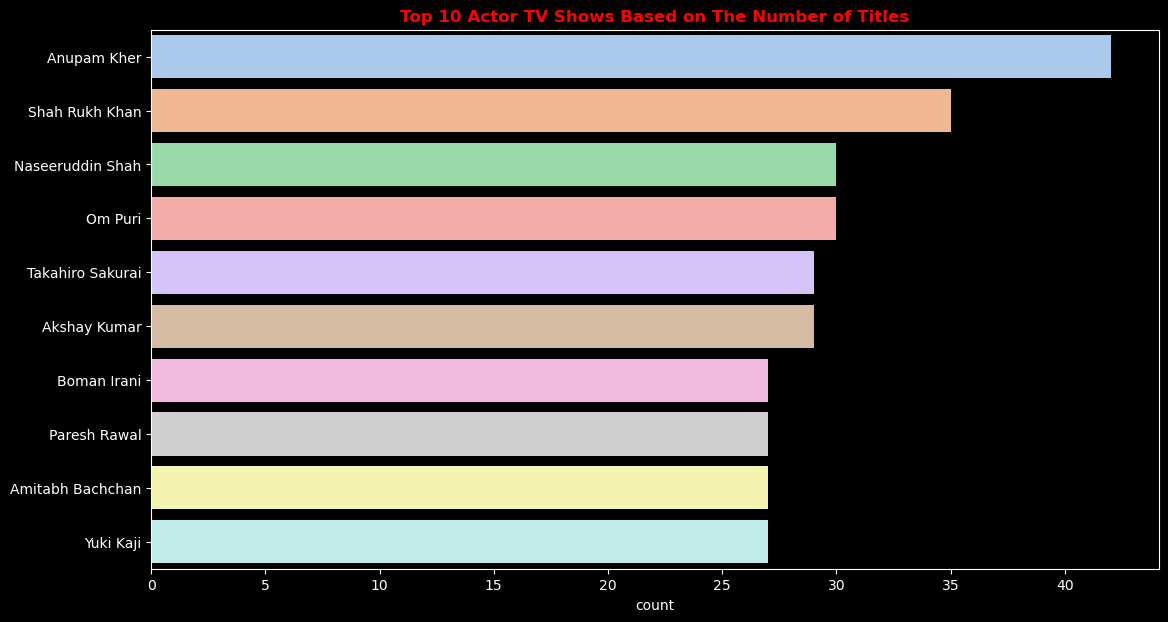

In [15]:
#  Top Actor on Netflix based on the number of titles

filtered_cast_shows = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles',color='red',weight='bold')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

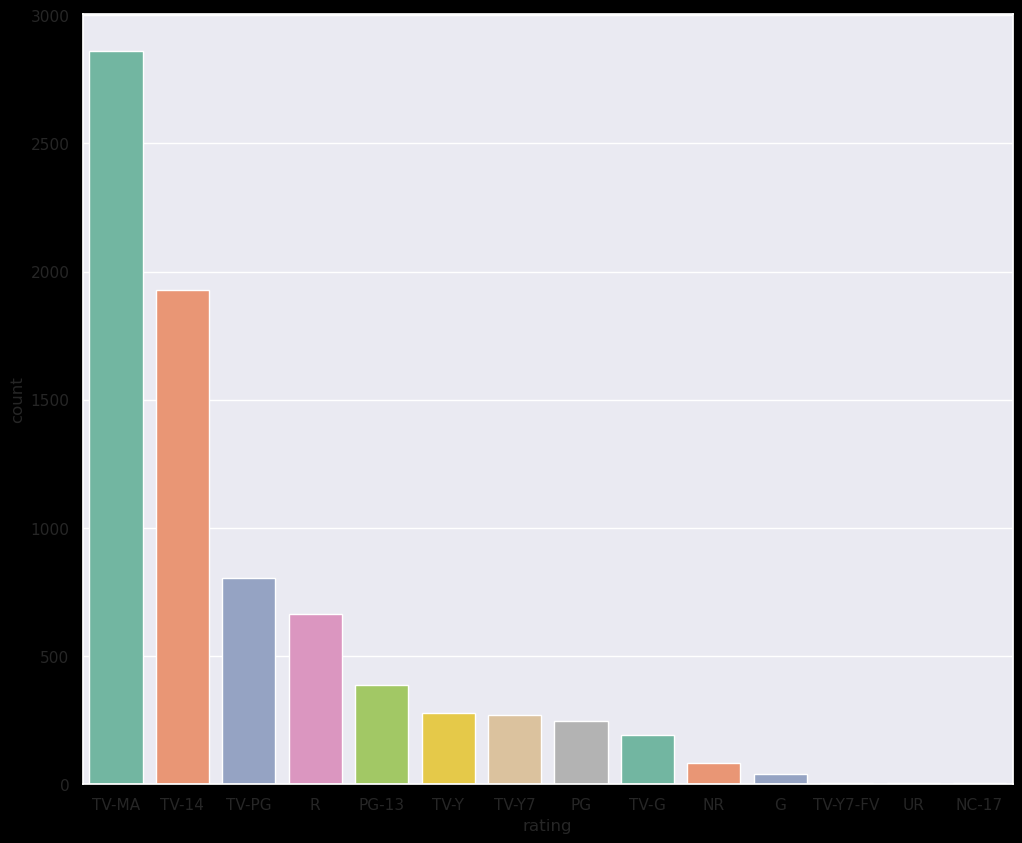

In [16]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2",
                   order=netflix_df['rating'].value_counts().index[0:15])

In [30]:
df = netflix_df.copy()
df=df.dropna()
df.shape

(7770, 15)

* Country

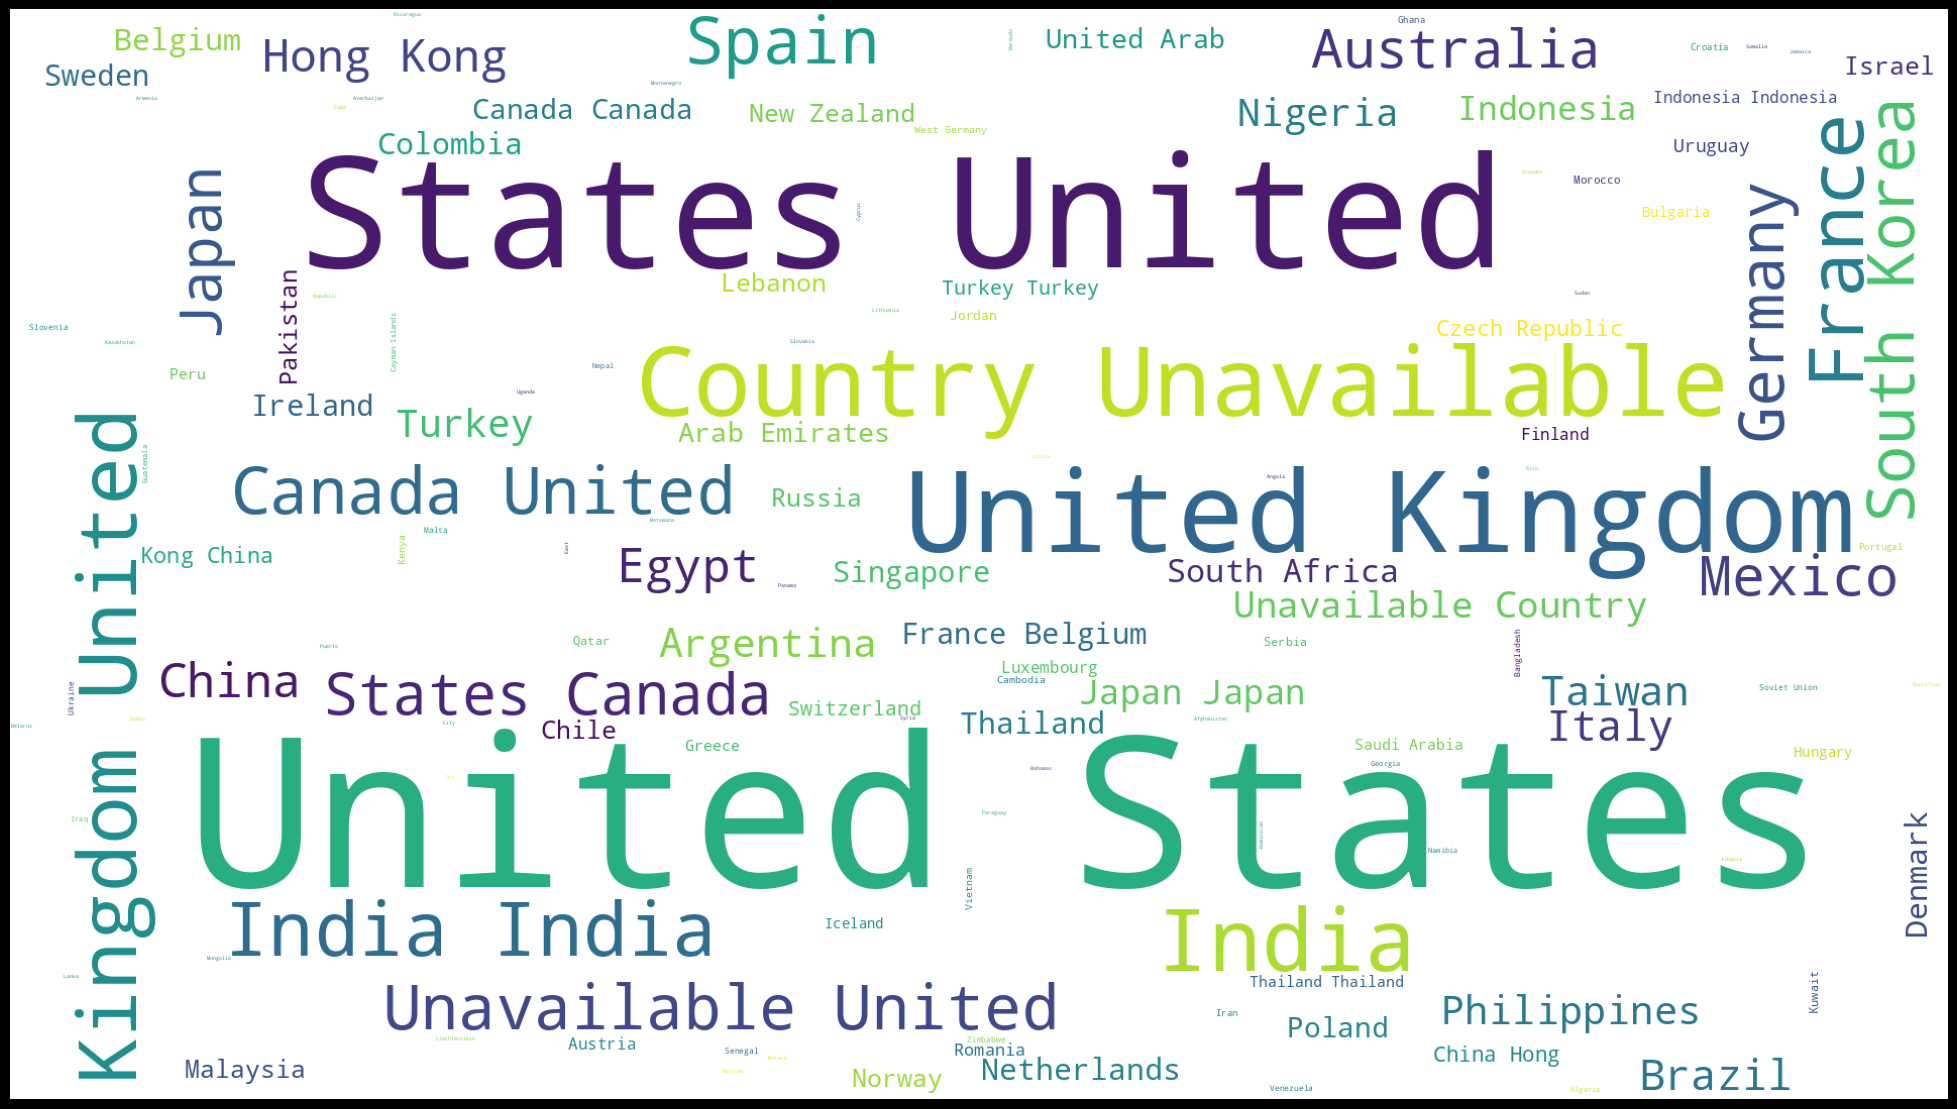

In [32]:
from wordcloud import WordCloud
plt.style.use('dark_background')
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

* **Cast in the Shows**

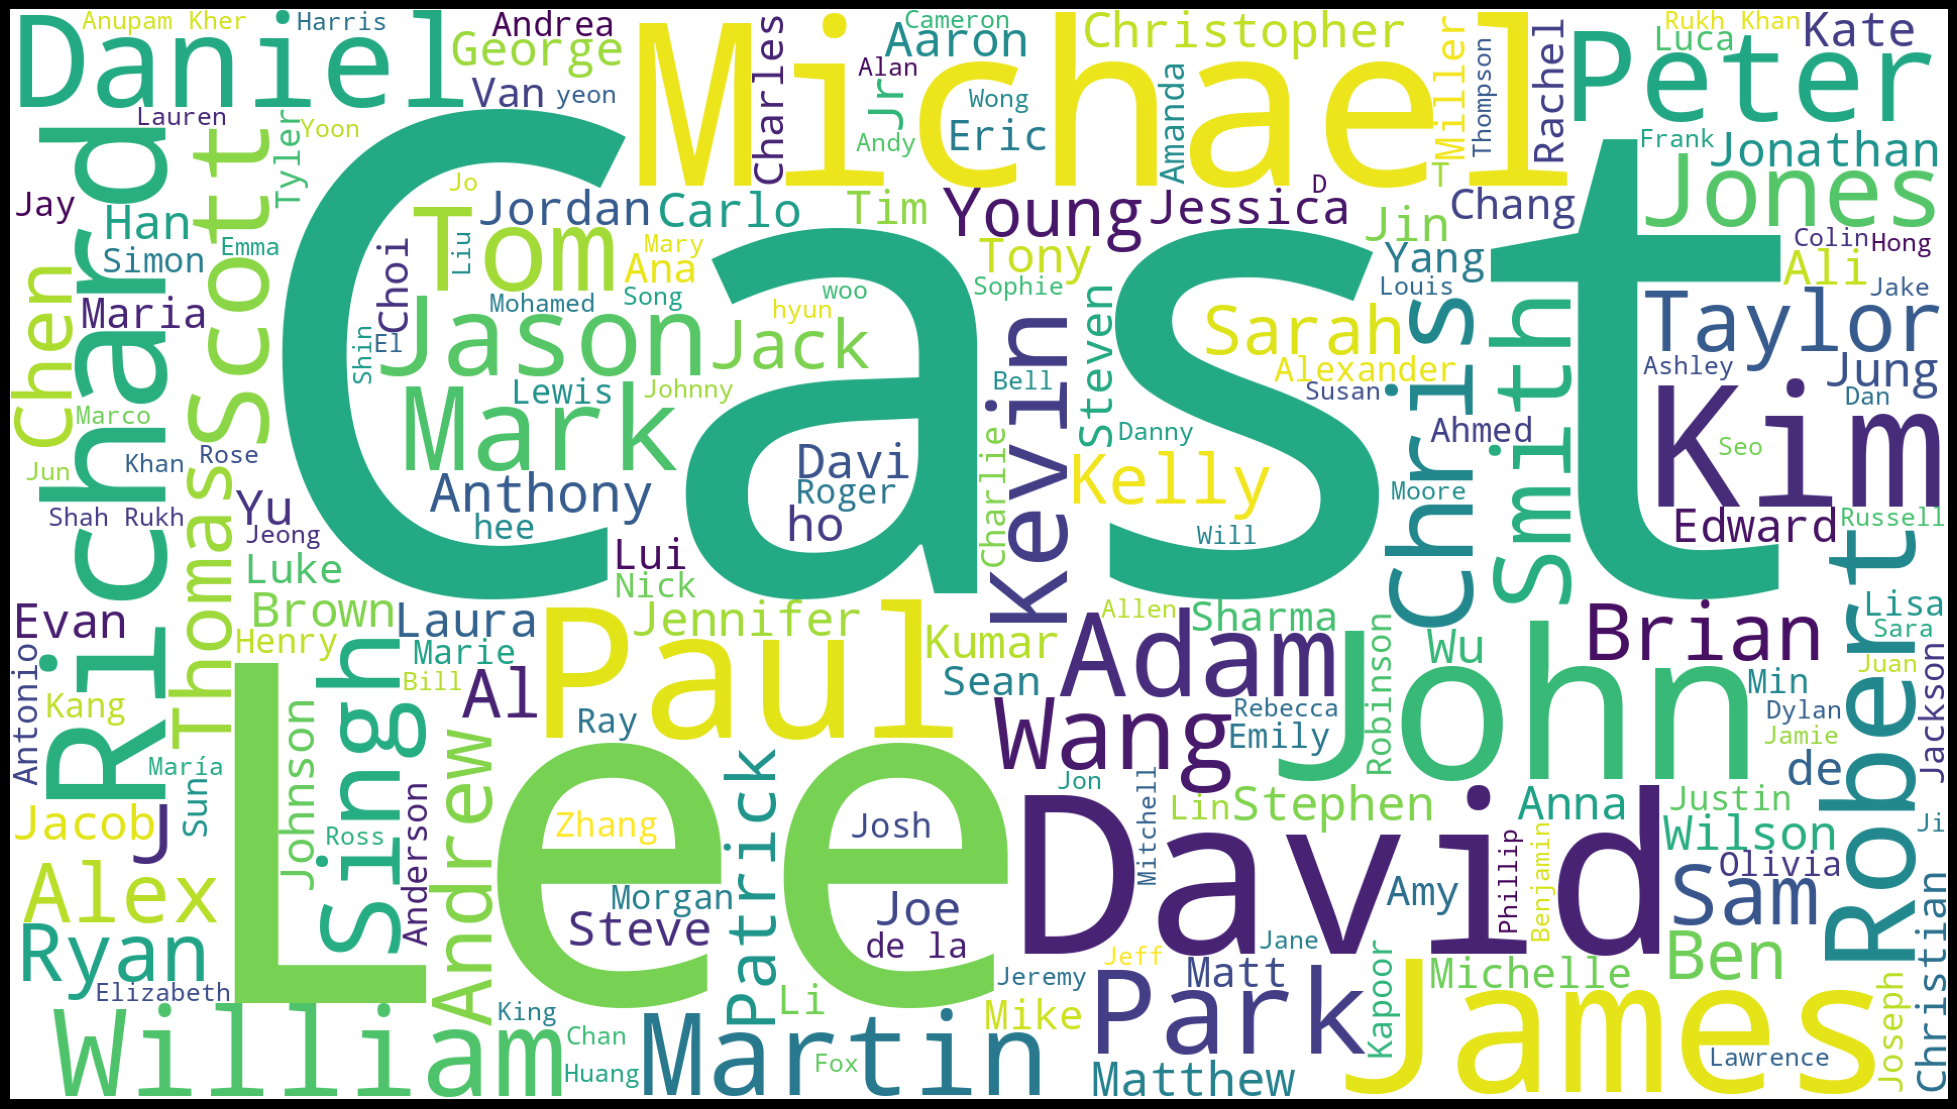

In [33]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

* **Directors**

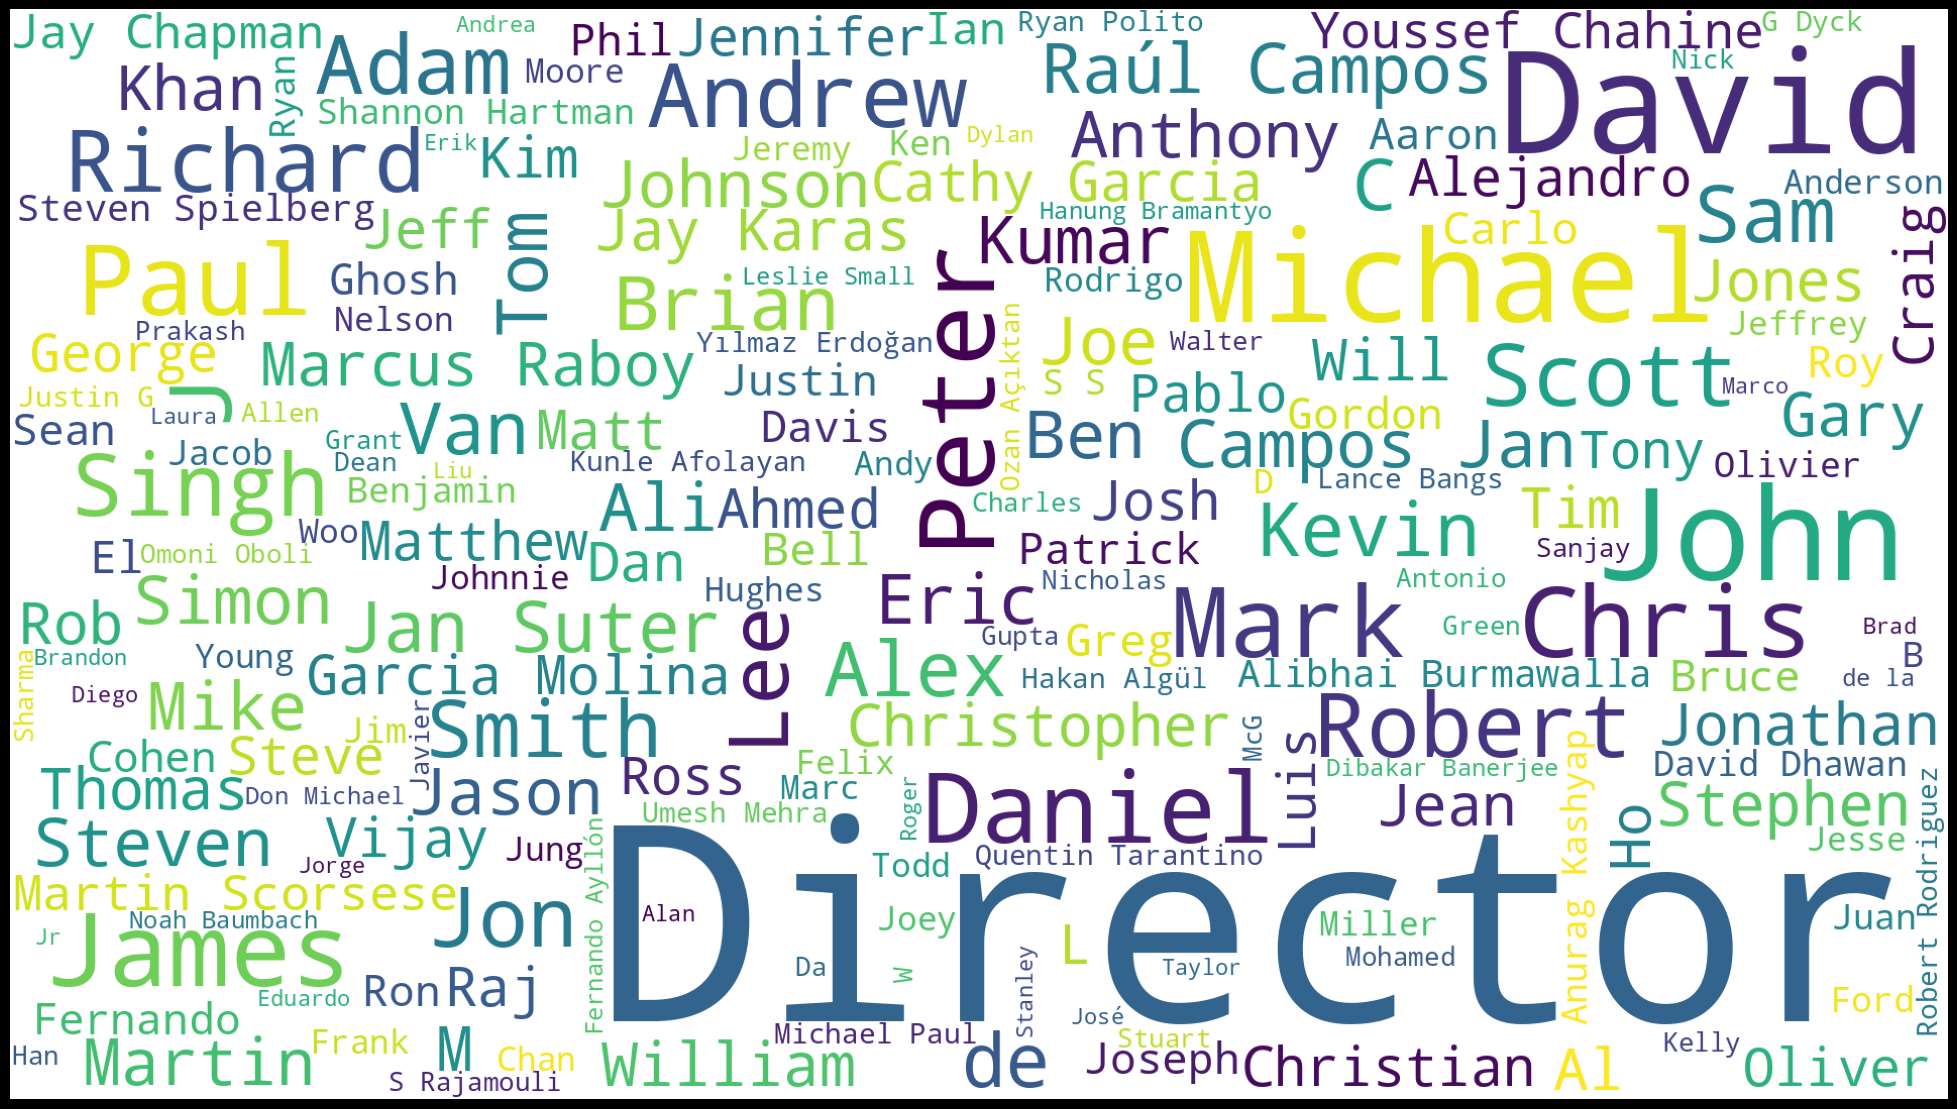

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

* **Categories**

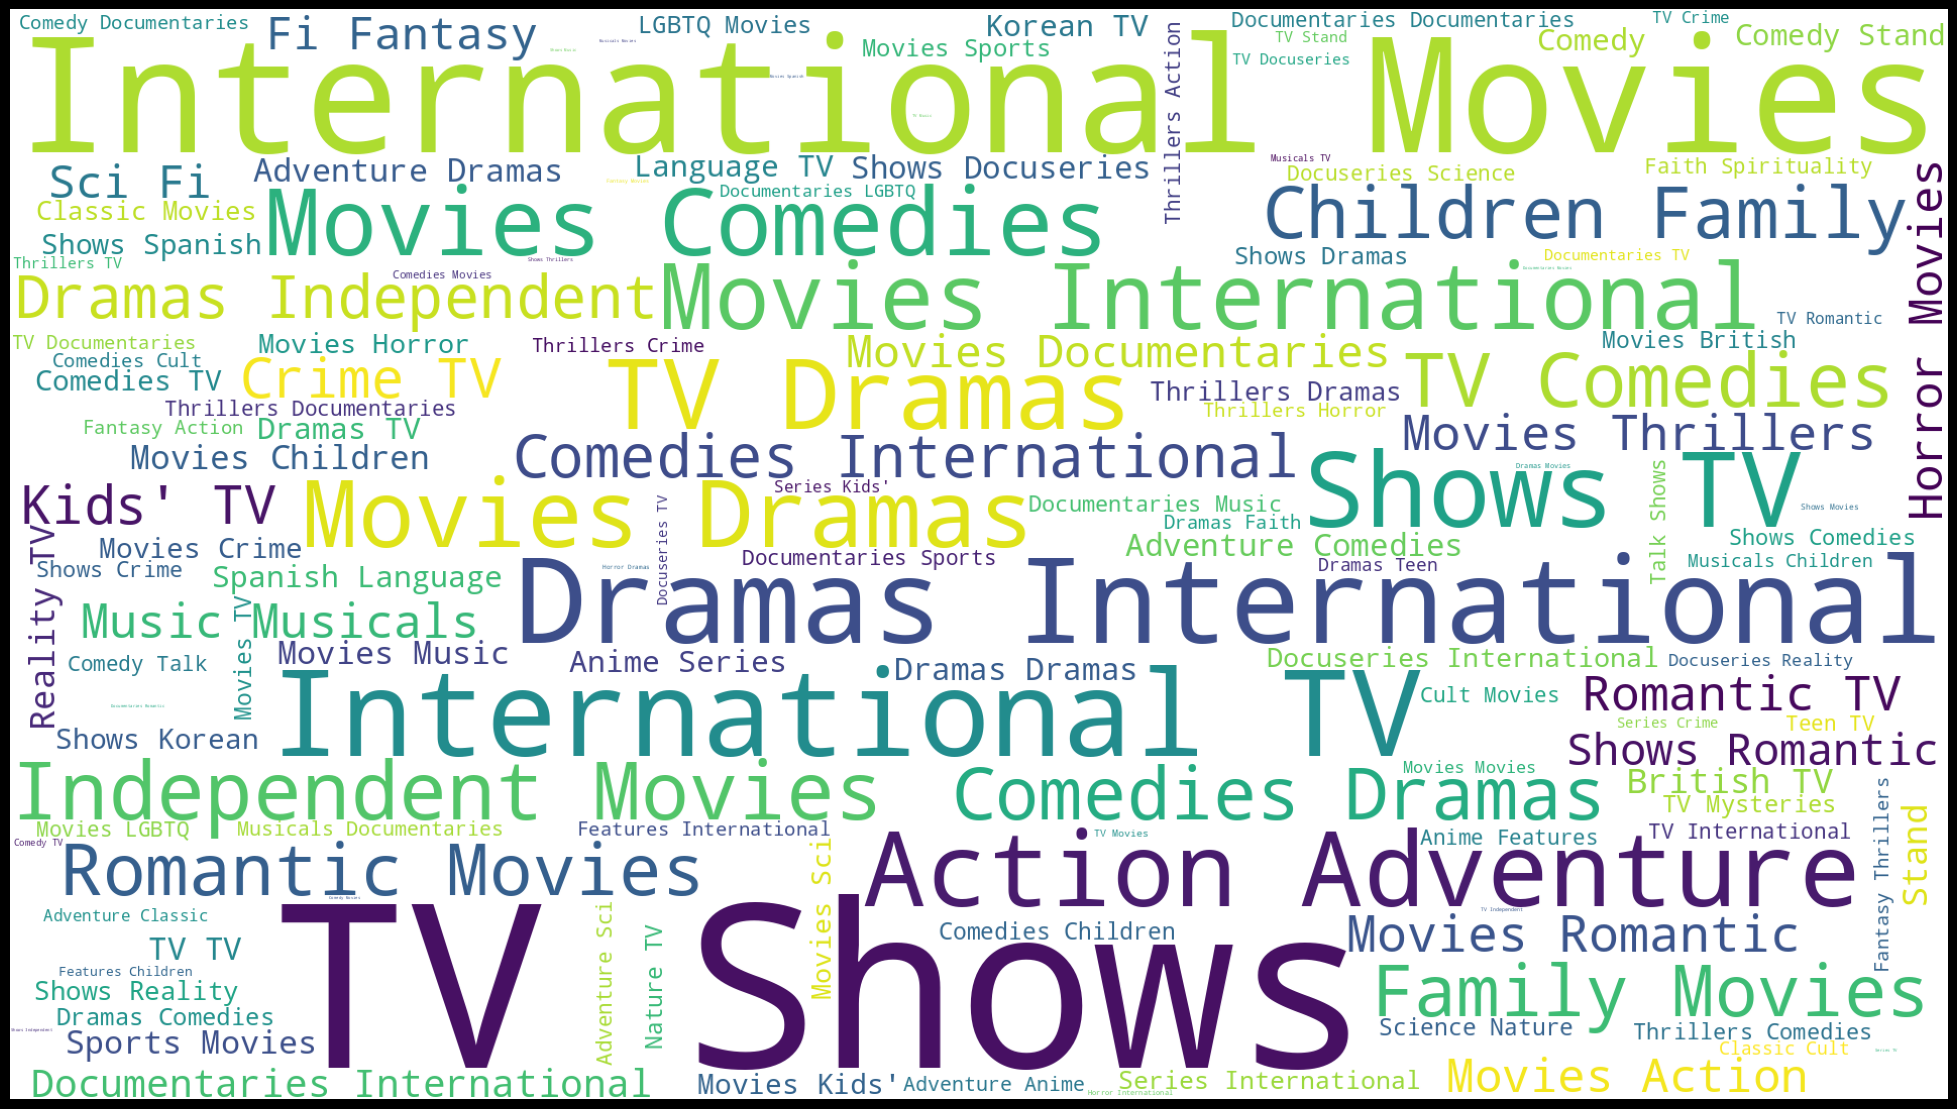

In [35]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()


# Thank You !